<a href="https://colab.research.google.com/github/smwalter96/PUS2020_MWalter/blob/master/HW9/Pus20_visualization_MatthewWalter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install census
!pip install CensusData

In [2]:
!pip install mapclassify

In [3]:
!pip install geopandas
!pip install descartes

     |████████████████████████████████| 972kB 9.7MB/s 
     |████████████████████████████████| 6.5MB 22.3MB/s 
     |████████████████████████████████| 14.8MB 274kB/s 


In [4]:
!pip install us

     |████████████████████████████████| 133kB 10.0MB/s 
  Created wheel for us: filename=us-2.0.2-cp36-none-any.whl size=11928 sha256=72b113f7eb67dbd6cec15c0d193dec295cb599a6697b869e907874094260596c
  Stored in directory: /root/.cache/pip/wheels/e2/16/45/6453383ffa495670f0f6b80a3e697a9771d98cfbaf8b451e73
  Created wheel for jellyfish: filename=jellyfish-0.6.1-cp36-cp36m-linux_x86_64.whl size=74737 sha256=a2e3b4650f5c98ea561e7b5d18e28fa6efec7e2f9642787ed89d87168e060ff4
  Stored in directory: /root/.cache/pip/wheels/9c/6f/33/92bb9a4b4562a60ba6a80cedbab8907e48bc7a8b1f369ea0ae
Successfully built us jellyfish


In [5]:
import pandas as pd
import numpy as np
import pylab as plt
import geopandas as gpd

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [29]:
myAPIkey =  pd.read_csv("/content/drive/My Drive/myapis.csv")["census"]

In [30]:
import censusdata
from census import Census
from us import states
c = Census(myAPIkey)

In [ ]:
censusdata.printtable(censusdata.censustable('acs5', 2018, 'B01003')), 

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B01003_001E  | TOTAL POPULATION               | !! Estimate Total                                        | int  
-------------------------------------------------------------------------------------------------------------------


(None,)

In [ ]:

st = censusdata.geographies(censusdata.censusgeo([('state', '*')]), 'acs5', 2018)
st

{'Alabama': censusgeo((('state', '01'),)),
 'Alaska': censusgeo((('state', '02'),)),
 'Arizona': censusgeo((('state', '04'),)),
 'Arkansas': censusgeo((('state', '05'),)),
 'California': censusgeo((('state', '06'),)),
 'Colorado': censusgeo((('state', '08'),)),
 'Connecticut': censusgeo((('state', '09'),)),
 'Delaware': censusgeo((('state', '10'),)),
 'District of Columbia': censusgeo((('state', '11'),)),
 'Florida': censusgeo((('state', '12'),)),
 'Georgia': censusgeo((('state', '13'),)),
 'Hawaii': censusgeo((('state', '15'),)),
 'Idaho': censusgeo((('state', '16'),)),
 'Illinois': censusgeo((('state', '17'),)),
 'Indiana': censusgeo((('state', '18'),)),
 'Iowa': censusgeo((('state', '19'),)),
 'Kansas': censusgeo((('state', '20'),)),
 'Kentucky': censusgeo((('state', '21'),)),
 'Louisiana': censusgeo((('state', '22'),)),
 'Maine': censusgeo((('state', '23'),)),
 'Maryland': censusgeo((('state', '24'),)),
 'Massachusetts': censusgeo((('state', '25'),)),
 'Michigan': censusgeo((('stat

In [11]:
st = ['01','04','05','06','08','09','10','11','12','13','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','44','45','46','47','48','49','50','51','53','54','55','56']

In [31]:
pop18 = pd.DataFrame()

for i in st:
  pop18 = pop18.append(censusdata.download('acs5', 2018,
                             censusdata.censusgeo([('state', i), 
                                                   ('tract', '*')]),
                             ["B01003_001E"]))

In [32]:
pop18.rename({'B01003_001E': 'pop'}, axis=1, inplace=True)
pop18

,pop
"Census Tract 57.01, Jefferson County, Alabama: Summary level: 140, state:01> county:073> tract:005701",2462
"Census Tract 107.04, Jefferson County, Alabama: Summary level: 140, state:01> county:073> tract:010704",4993
"Census Tract 129.08, Jefferson County, Alabama: Summary level: 140, state:01> county:073> tract:012908",6048
"Census Tract 53.02, Jefferson County, Alabama: Summary level: 140, state:01> county:073> tract:005302",3628
"Census Tract 111.07, Jefferson County, Alabama: Summary level: 140, state:01> county:073> tract:011107",11535
...,...
"Census Tract 5.02, Natrona County, Wyoming: Summary level: 140, state:56> county:025> tract:000502",2720
"Census Tract 9.02, Natrona County, Wyoming: Summary level: 140, state:56> county:025> tract:000902",3833
"Census Tract 17, Natrona County, Wyoming: Summary level: 140, state:56> county:025> tract:001700",5047
"Census Tract 3, Natrona County, Wyoming: Summary level: 140, state:56> county:025> tract:000300",4332


In [33]:
def gettract(cname):
  return cname.split(',')[0]
pop18["name"] = pop18.index.astype(str).map(gettract)

def gettract(cname):
  return cname.split(':')[3]
pop18["state"] = pop18.index.astype(str).map(gettract)

def gettract(cname):
  return cname.split(':')[4]
pop18["county"] = pop18.index.astype(str).map(gettract)

pop18.sort_values('name')

,pop,name,state,county
"Census Tract 1, Columbia County, New York: Summary level: 140, state:36> county:021> tract:000100",2221,Census Tract 1,36> county,021> tract
"Census Tract 1, Routt County, Colorado: Summary level: 140, state:08> county:107> tract:000100",2155,Census Tract 1,08> county,107> tract
"Census Tract 1, Lincoln County, Montana: Summary level: 140, state:30> county:053> tract:000100",3345,Census Tract 1,30> county,053> tract
"Census Tract 1, Powder River County, Montana: Summary level: 140, state:30> county:075> tract:000100",1619,Census Tract 1,30> county,075> tract
"Census Tract 1, Musselshell County, Montana: Summary level: 140, state:30> county:065> tract:000100",2717,Census Tract 1,30> county,065> tract
...,...,...,...,...
"Census Tract 999.02, Orange County, California: Summary level: 140, state:06> county:059> tract:099902",4414,Census Tract 999.02,06> county,059> tract
"Census Tract 999.03, Orange County, California: Summary level: 140, state:06> county:059> tract:099903",5661,Census Tract 999.03,06> county,059> tract
"Census Tract 999.04, Orange County, California: Summary level: 140, state:06> county:059> tract:099904",6542,Census Tract 999.04,06> county,059> tract
"Census Tract 999.05, Orange County, California: Summary level: 140, state:06> county:059> tract:099905",4252,Census Tract 999.05,06> county,059> tract


In [34]:
pop18['state1'] = pop18['state'].str.extract('(\d+)').astype(int)
pop18['county1'] = pop18['county'].str.extract('(\d+)').astype(int)
pop18["MATCH1"] = pop18["state1"].astype(str) + pop18["name"] + pop18['county1'].astype(str)
pop18.sort_values('MATCH1')

,pop,name,state,county,state1,county1,MATCH1
"Census Tract 101.01, New Castle County, Delaware: Summary level: 140, state:10> county:003> tract:010101",4019,Census Tract 101.01,10> county,003> tract,10,3,10Census Tract 101.013
"Census Tract 101.04, New Castle County, Delaware: Summary level: 140, state:10> county:003> tract:010104",3452,Census Tract 101.04,10> county,003> tract,10,3,10Census Tract 101.043
"Census Tract 102, New Castle County, Delaware: Summary level: 140, state:10> county:003> tract:010200",2157,Census Tract 102,10> county,003> tract,10,3,10Census Tract 1023
"Census Tract 103, New Castle County, Delaware: Summary level: 140, state:10> county:003> tract:010300",3220,Census Tract 103,10> county,003> tract,10,3,10Census Tract 1033
"Census Tract 104, New Castle County, Delaware: Summary level: 140, state:10> county:003> tract:010400",4697,Census Tract 104,10> county,003> tract,10,3,10Census Tract 1043
...,...,...,...,...,...,...,...
"Census Tract 9800, Hartford County, Connecticut: Summary level: 140, state:09> county:003> tract:980000",0,Census Tract 9800,09> county,003> tract,9,3,9Census Tract 98003
"Census Tract 9900, Fairfield County, Connecticut: Summary level: 140, state:09> county:001> tract:990000",0,Census Tract 9900,09> county,001> tract,9,1,9Census Tract 99001
"Census Tract 9900, New Haven County, Connecticut: Summary level: 140, state:09> county:009> tract:990000",0,Census Tract 9900,09> county,009> tract,9,9,9Census Tract 99009
"Census Tract 9901, New London County, Connecticut: Summary level: 140, state:09> county:011> tract:990100",0,Census Tract 9901,09> county,011> tract,9,11,9Census Tract 990111


In [35]:
cd /content/drive/My Drive/acs_2018

/content


In [36]:
import urllib, os
for i in st:
    os.system('wget https://www2.census.gov/geo/tiger/TIGER2018/TRACT/tl_2018_%s_tract.zip' % i)


In [19]:
import zipfile
dir_name = '/content/drive/My Drive/acs_2018'
extension = ".zip"

os.chdir(dir_name) 
for item in os.listdir(dir_name):
    if item.endswith(extension): 
        file_name = os.path.abspath(item) 
        zip_ref = zipfile.ZipFile(file_name) 
        zip_ref.extractall(dir_name) 
        zip_ref.close() 
        os.remove(file_name) 

In [20]:
from pathlib import Path
folder = Path('/content/drive/My Drive/acs_2018')

gdf = pd.concat([
    gpd.read_file(shp)
    for shp in folder.glob("*.shp")
]).pipe(gpd.GeoDataFrame)


In [21]:
gdf

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,05,119,003304,05119003304,33.04,Census Tract 33.04,G5020,S,5503991,409051,+34.7875234,-092.2458551,"POLYGON ((-92.26559 34.78090, -92.26543 34.780..."
1,05,119,003500,05119003500,35,Census Tract 35,G5020,S,25337534,157182,+34.9057432,-092.1382940,"POLYGON ((-92.17812 34.90317, -92.17799 34.907..."
2,05,119,003607,05119003607,36.07,Census Tract 36.07,G5020,S,5936932,41426,+34.8560069,-092.0865125,"POLYGON ((-92.11033 34.85293, -92.11031 34.853..."
3,05,119,003608,05119003608,36.08,Census Tract 36.08,G5020,S,4885717,0,+34.8741617,-092.1043791,"POLYGON ((-92.12775 34.86747, -92.12758 34.867..."
4,05,119,004007,05119004007,40.07,Census Tract 40.07,G5020,S,81229886,6773298,+34.6744189,-092.2153550,"POLYGON ((-92.26900 34.62818, -92.26900 34.628..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,55,043,960800,55043960800,9608,Census Tract 9608,G5020,S,253210348,15987542,+42.7117441,-090.6232729,"POLYGON ((-90.78594 42.75890, -90.78579 42.759..."
1405,55,043,960100,55043960100,9601,Census Tract 9601,G5020,S,364751519,3687082,+43.0851304,-090.5338688,"POLYGON ((-90.65769 43.05224, -90.65765 43.052..."
1406,55,043,960500,55043960500,9605,Census Tract 9605,G5020,S,569068167,31186956,+42.8066244,-090.8677346,"POLYGON ((-91.07932 42.82298, -91.07897 42.825..."
1407,55,043,961100,55043961100,9611,Census Tract 9611,G5020,S,188421248,10418252,+42.6224241,-090.5534011,"POLYGON ((-90.69007 42.60893, -90.68964 42.609..."


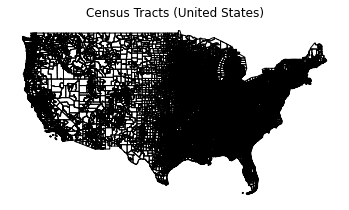

In [22]:
f, ax = plt.subplots(1)
ax = gdf.plot(color="None", edgecolor='k', ax=ax)
ax.set_axis_off()
plt.title('Census Tracts (United States)')
plt.show()

Figure 1: A map of all the census tracts in the contiguous United States for the 2018 American Community Survey.

In [23]:
gdf['state1'] = gdf['STATEFP'].str.extract('(\d+)').astype(int)
gdf['county1'] = gdf['COUNTYFP'].str.extract('(\d+)').astype(int)
gdf["MATCH"] = gdf["state1"].astype(str) + gdf["NAMELSAD"] + gdf['county1'].astype(str)
gdf.sort_values('MATCH')

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,state1,county1,MATCH
65,10,003,010101,10003010101,101.01,Census Tract 101.01,G5020,S,2785379,0,+39.8139503,-075.4530991,"POLYGON ((-75.46947 39.81422, -75.46846 39.815...",10,3,10Census Tract 101.013
12,10,003,010104,10003010104,101.04,Census Tract 101.04,G5020,S,3629091,2863836,+39.7961063,-075.4534792,"POLYGON ((-75.47421 39.78841, -75.47409 39.788...",10,3,10Census Tract 101.043
66,10,003,010200,10003010200,102,Census Tract 102,G5020,S,939935,0,+39.8087548,-075.4682701,"POLYGON ((-75.47606 39.80850, -75.47532 39.809...",10,3,10Census Tract 1023
100,10,003,010300,10003010300,103,Census Tract 103,G5020,S,1832184,0,+39.8024262,-075.4675404,"POLYGON ((-75.48088 39.80435, -75.48065 39.804...",10,3,10Census Tract 1033
71,10,003,010400,10003010400,104,Census Tract 104,G5020,S,2402622,0,+39.7932234,-075.4802454,"POLYGON ((-75.49045 39.79328, -75.49039 39.793...",10,3,10Census Tract 1043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,09,003,980000,09003980000,9800,Census Tract 9800,G5020,S,6516085,0,+41.9373326,-072.6864928,"POLYGON ((-72.70919 41.92936, -72.70887 41.930...",9,3,9Census Tract 98003
529,09,001,990000,09001990000,9900,Census Tract 9900,G5020,S,0,424164840,+41.0600924,-073.2933677,"POLYGON ((-73.64983 40.97920, -73.64633 40.986...",9,1,9Census Tract 99001
649,09,009,990000,09009990000,9900,Census Tract 9900,G5020,S,0,586791386,+41.1861613,-072.8148602,"POLYGON ((-73.10778 41.16860, -73.10724 41.169...",9,9,9Census Tract 99009
262,09,011,990100,09011990100,9901,Census Tract 9901,G5020,S,0,93371615,+41.2561509,-072.2301607,"POLYGON ((-72.33793 41.27590, -72.33655 41.277...",9,11,9Census Tract 990111


In [37]:
popn = gdf.merge(pop18, left_on = 'MATCH', right_on = 'MATCH1')
popn


,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,state1_x,county1_x,MATCH,pop,name,state,county,state1_y,county1_y,MATCH1
0,05,119,003304,05119003304,33.04,Census Tract 33.04,G5020,S,5503991,409051,+34.7875234,-092.2458551,"POLYGON ((-92.26559 34.78090, -92.26543 34.780...",5,119,5Census Tract 33.04119,5760,Census Tract 33.04,05> county,119> tract,5,119,5Census Tract 33.04119
1,05,119,003500,05119003500,35,Census Tract 35,G5020,S,25337534,157182,+34.9057432,-092.1382940,"POLYGON ((-92.17812 34.90317, -92.17799 34.907...",5,119,5Census Tract 35119,2955,Census Tract 35,05> county,119> tract,5,119,5Census Tract 35119
2,05,119,003607,05119003607,36.07,Census Tract 36.07,G5020,S,5936932,41426,+34.8560069,-092.0865125,"POLYGON ((-92.11033 34.85293, -92.11031 34.853...",5,119,5Census Tract 36.07119,5036,Census Tract 36.07,05> county,119> tract,5,119,5Census Tract 36.07119
3,05,119,003608,05119003608,36.08,Census Tract 36.08,G5020,S,4885717,0,+34.8741617,-092.1043791,"POLYGON ((-92.12775 34.86747, -92.12758 34.867...",5,119,5Census Tract 36.08119,4827,Census Tract 36.08,05> county,119> tract,5,119,5Census Tract 36.08119
4,05,119,004007,05119004007,40.07,Census Tract 40.07,G5020,S,81229886,6773298,+34.6744189,-092.2153550,"POLYGON ((-92.26900 34.62818, -92.26900 34.628...",5,119,5Census Tract 40.07119,2579,Census Tract 40.07,05> county,119> tract,5,119,5Census Tract 40.07119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72867,55,043,960800,55043960800,9608,Census Tract 9608,G5020,S,253210348,15987542,+42.7117441,-090.6232729,"POLYGON ((-90.78594 42.75890, -90.78579 42.759...",55,43,55Census Tract 960843,2808,Census Tract 9608,55> county,043> tract,55,43,55Census Tract 960843
72868,55,043,960100,55043960100,9601,Census Tract 9601,G5020,S,364751519,3687082,+43.0851304,-090.5338688,"POLYGON ((-90.65769 43.05224, -90.65765 43.052...",55,43,55Census Tract 960143,3899,Census Tract 9601,55> county,043> tract,55,43,55Census Tract 960143
72869,55,043,960500,55043960500,9605,Census Tract 9605,G5020,S,569068167,31186956,+42.8066244,-090.8677346,"POLYGON ((-91.07932 42.82298, -91.07897 42.825...",55,43,55Census Tract 960543,3489,Census Tract 9605,55> county,043> tract,55,43,55Census Tract 960543
72870,55,043,961100,55043961100,9611,Census Tract 9611,G5020,S,188421248,10418252,+42.6224241,-090.5534011,"POLYGON ((-90.69007 42.60893, -90.68964 42.609...",55,43,55Census Tract 961143,4576,Census Tract 9611,55> county,043> tract,55,43,55Census Tract 961143


In [38]:
pop1  = popn.to_crs({'init': 'epsg:32633'})


/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [39]:
pop1["area"] = pop1['geometry'].area/ 10**6
pop1['pdensity'] = pop1['pop'] / pop1['area']
pop1

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,state1_x,county1_x,MATCH,pop,name,state,county,state1_y,county1_y,MATCH1,area,pdensity
0,05,119,003304,05119003304,33.04,Census Tract 33.04,G5020,S,5503991,409051,+34.7875234,-092.2458551,"POLYGON ((-6237916.423 12567721.389, -6237918....",5,119,5Census Tract 33.04119,5760,Census Tract 33.04,05> county,119> tract,5,119,5Census Tract 33.04119,15.293727,376.625003
1,05,119,003500,05119003500,35,Census Tract 35,G5020,S,25337534,157182,+34.9057432,-092.1382940,"POLYGON ((-6224823.607 12546066.592, -6224123....",5,119,5Census Tract 35119,2955,Census Tract 35,05> county,119> tract,5,119,5Census Tract 35119,65.764371,44.933145
2,05,119,003607,05119003607,36.07,Census Tract 36.07,G5020,S,5936932,41426,+34.8560069,-092.0865125,"POLYGON ((-6237420.414 12541516.346, -6237373....",5,119,5Census Tract 36.07119,5036,Census Tract 36.07,05> county,119> tract,5,119,5Census Tract 36.07119,15.462450,325.692249
3,05,119,003608,05119003608,36.08,Census Tract 36.08,G5020,S,4885717,0,+34.8741617,-092.1043791,"POLYGON ((-6233925.624 12542551.207, -6233893....",5,119,5Census Tract 36.08119,4827,Census Tract 36.08,05> county,119> tract,5,119,5Census Tract 36.08119,12.624467,382.352779
4,05,119,004007,05119004007,40.07,Census Tract 40.07,G5020,S,81229886,6773298,+34.6744189,-092.2153550,"POLYGON ((-6261664.499 12581165.554, -6261644....",5,119,5Census Tract 40.07119,2579,Census Tract 40.07,05> county,119> tract,5,119,5Census Tract 40.07119,228.827189,11.270514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72867,55,043,960800,55043960800,9608,Census Tract 9608,G5020,S,253210348,15987542,+42.7117441,-090.6232729,"POLYGON ((-5117580.056 11822074.217, -5117516....",55,43,55Census Tract 960843,2808,Census Tract 9608,55> county,043> tract,55,43,55Census Tract 960843,537.372369,5.225427
72868,55,043,960100,55043960100,9601,Census Tract 9601,G5020,S,364751519,3687082,+43.0851304,-090.5338688,"POLYGON ((-5080778.789 11790963.405, -5080723....",55,43,55Census Tract 960143,3899,Census Tract 9601,55> county,043> tract,55,43,55Census Tract 960143,727.657753,5.358288
72869,55,043,960500,55043960500,9605,Census Tract 9605,G5020,S,569068167,31186956,+42.8066244,-090.8677346,"POLYGON ((-5095266.618 11849395.700, -5094968....",55,43,55Census Tract 960543,3489,Census Tract 9605,55> county,043> tract,55,43,55Census Tract 960543,1191.773237,2.927570
72870,55,043,961100,55043961100,9611,Census Tract 9611,G5020,S,188421248,10418252,+42.6224241,-090.5534011,"POLYGON ((-5143571.300 11820823.799, -5143505....",55,43,55Census Tract 961143,4576,Census Tract 9611,55> county,043> tract,55,43,55Census Tract 961143,398.193601,11.491897


In [40]:
urban_centers = pop1.loc[(pop1['pdensity'] >= 1500) & (pop1['pop'] >= 2500)] 

urban_centers

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,state1_x,county1_x,MATCH,pop,name,state,county,state1_y,county1_y,MATCH1,area,pdensity
1916,10,003,002200,10003002200,22,Census Tract 22,G5020,S,258393,0,+39.7447495,-075.5633691,"POLYGON ((-5989436.892 10073766.588, -5989435....",10,3,10Census Tract 223,2753,Census Tract 22,10> county,003> tract,10,3,10Census Tract 223,0.627912,4384.371055
1928,10,003,000500,10003000500,5,Census Tract 5,G5020,S,499652,9820,+39.7544822,-075.5399945,"POLYGON ((-5988049.751 10071206.984, -5988032....",10,3,10Census Tract 53,3782,Census Tract 5,10> county,003> tract,10,3,10Census Tract 53,1.237545,3056.051160
1929,10,003,000601,10003000601,6.01,Census Tract 6.01,G5020,S,819673,0,+39.7527066,-075.5290060,"POLYGON ((-5988659.083 10069541.554, -5988575....",10,3,10Census Tract 6.013,3420,Census Tract 6.01,10> county,003> tract,10,3,10Census Tract 6.013,1.991219,1717.540457
1930,10,003,000602,10003000602,6.02,Census Tract 6.02,G5020,S,626036,31448,+39.7500708,-075.5369211,"POLYGON ((-5988403.114 10070615.316, -5988390....",10,3,10Census Tract 6.023,2956,Census Tract 6.02,10> county,003> tract,10,3,10Census Tract 6.023,1.597409,1850.496134
1931,10,003,001100,10003001100,11,Census Tract 11,G5020,S,518754,12917,+39.7560465,-075.5577931,"POLYGON ((-5987635.252 10073191.965, -5987566....",10,3,10Census Tract 113,3464,Census Tract 11,10> county,003> tract,10,3,10Census Tract 113,1.291381,2682.399835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72782,55,079,003200,55079003200,32,Census Tract 32,G5020,S,813096,0,+43.1011585,-088.0011119,"POLYGON ((-5180594.547 11502728.246, -5180424....",55,79,55Census Tract 3279,2711,Census Tract 32,55> county,079> tract,55,79,55Census Tract 3279,1.640284,1652.762870
72783,55,079,003300,55079003300,33,Census Tract 33,G5020,S,1471144,0,+43.1010455,-088.0173060,"POLYGON ((-5179878.029 11504994.315, -5179733....",55,79,55Census Tract 3379,5298,Census Tract 33,55> county,079> tract,55,79,55Census Tract 3379,2.967408,1785.396480
72810,55,079,005900,55079005900,59,Census Tract 59,G5020,S,850834,0,+43.0682111,-087.9852358,"POLYGON ((-5185560.471 11502745.336, -5185515....",55,79,55Census Tract 5979,3697,Census Tract 59,55> county,079> tract,55,79,55Census Tract 5979,1.718505,2151.288992
72814,55,079,007000,55079007000,70,Census Tract 70,G5020,S,663450,0,+43.0742456,-087.9112246,"POLYGON ((-5187813.431 11494152.174, -5187644....",55,79,55Census Tract 7079,3067,Census Tract 70,55> county,079> tract,55,79,55Census Tract 7079,1.340573,2287.827351


In [41]:
urban_centers  = urban_centers.to_crs({'init': 'epsg:4326'})


/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [ ]:
f, ax = plt.subplots(1)
ax = urban_centers.plot(color="r", edgecolor='k', ax=ax)
ax.set_axis_off()
plt.title('Urban Center Census Tracts (United States)')
plt.show()


Figure 2: A map of all urban center census tracts. This was determined as census tracts with population greater or equal to 2500 and a population density greater or equal to 1500 people per square kilometer. Most city centers are seen along the coast lines.

In [42]:
demo = pd.DataFrame()

for i in st:
  demo = demo.append(censusdata.download('acs5', 2018,
                             censusdata.censusgeo([('state', i), 
                                                   ('tract', '*')]),
                             ["B02001_002E", "B02001_003E", "B02001_005E", "B01002_001E", "B19013_001E"]))

In [43]:
demo.rename({'B02001_002E': 'w_pop', 'B02001_003E': 'b_pop', 'B02001_005E': 'a_pop', 'B01002_001E': 'age', 'B19013_001E': 'income'}, axis=1, inplace=True)
demo

,w_pop,b_pop,a_pop,age,income
"Census Tract 57.01, Jefferson County, Alabama: Summary level: 140, state:01> county:073> tract:005701",33,2414,0,40.2,34709.0
"Census Tract 107.04, Jefferson County, Alabama: Summary level: 140, state:01> county:073> tract:010704",3762,908,139,20.7,74776.0
"Census Tract 129.08, Jefferson County, Alabama: Summary level: 140, state:01> county:073> tract:012908",2573,1793,153,30.1,51176.0
"Census Tract 53.02, Jefferson County, Alabama: Summary level: 140, state:01> county:073> tract:005302",1932,1513,39,47.4,61148.0
"Census Tract 111.07, Jefferson County, Alabama: Summary level: 140, state:01> county:073> tract:011107",10369,838,29,38.4,85081.0
...,...,...,...,...,...
"Census Tract 5.02, Natrona County, Wyoming: Summary level: 140, state:56> county:025> tract:000502",2578,0,41,39.7,73616.0
"Census Tract 9.02, Natrona County, Wyoming: Summary level: 140, state:56> county:025> tract:000902",3732,32,23,41.3,87500.0
"Census Tract 17, Natrona County, Wyoming: Summary level: 140, state:56> county:025> tract:001700",4553,110,54,37.0,76705.0
"Census Tract 3, Natrona County, Wyoming: Summary level: 140, state:56> county:025> tract:000300",3944,130,73,35.7,42813.0


In [44]:
def gettract(cname):
  return cname.split(',')[0]
demo["name"] = demo.index.astype(str).map(gettract)

def gettract(cname):
  return cname.split(':')[3]
demo["state"] = demo.index.astype(str).map(gettract)

def gettract(cname):
  return cname.split(':')[4]
demo["county"] = demo.index.astype(str).map(gettract)

demo.sort_values('name')

,w_pop,b_pop,a_pop,age,income,name,state,county
"Census Tract 1, Columbia County, New York: Summary level: 140, state:36> county:021> tract:000100",2124,0,21,50.0,58618.0,Census Tract 1,36> county,021> tract
"Census Tract 1, Routt County, Colorado: Summary level: 140, state:08> county:107> tract:000100",2143,7,0,53.6,74944.0,Census Tract 1,08> county,107> tract
"Census Tract 1, Lincoln County, Montana: Summary level: 140, state:30> county:053> tract:000100",3134,1,26,51.2,39342.0,Census Tract 1,30> county,053> tract
"Census Tract 1, Powder River County, Montana: Summary level: 140, state:30> county:075> tract:000100",1536,0,0,53.0,52457.0,Census Tract 1,30> county,075> tract
"Census Tract 1, Musselshell County, Montana: Summary level: 140, state:30> county:065> tract:000100",2700,0,3,49.6,50101.0,Census Tract 1,30> county,065> tract
...,...,...,...,...,...,...,...,...
"Census Tract 999.02, Orange County, California: Summary level: 140, state:06> county:059> tract:099902",2618,69,1221,36.5,71511.0,Census Tract 999.02,06> county,059> tract
"Census Tract 999.03, Orange County, California: Summary level: 140, state:06> county:059> tract:099903",2557,39,2163,36.5,79583.0,Census Tract 999.03,06> county,059> tract
"Census Tract 999.04, Orange County, California: Summary level: 140, state:06> county:059> tract:099904",2417,61,2864,38.2,46375.0,Census Tract 999.04,06> county,059> tract
"Census Tract 999.05, Orange County, California: Summary level: 140, state:06> county:059> tract:099905",2925,39,676,36.8,70694.0,Census Tract 999.05,06> county,059> tract


In [45]:
demo['state1'] = demo['state'].str.extract('(\d+)').astype(int)
demo['county1'] = demo['county'].str.extract('(\d+)').astype(int)
demo["MATCH1"] = demo["state1"].astype(str) + demo["name"] + demo['county1'].astype(str)
demo = demo[demo['income'] != -666666666.0	]
demo.sort_values('MATCH1')


,w_pop,b_pop,a_pop,age,income,name,state,county,state1,county1,MATCH1
"Census Tract 101.01, New Castle County, Delaware: Summary level: 140, state:10> county:003> tract:010101",1622,1622,545,34.1,45851.0,Census Tract 101.01,10> county,003> tract,10,3,10Census Tract 101.013
"Census Tract 101.04, New Castle County, Delaware: Summary level: 140, state:10> county:003> tract:010104",2155,1206,67,36.1,48173.0,Census Tract 101.04,10> county,003> tract,10,3,10Census Tract 101.043
"Census Tract 102, New Castle County, Delaware: Summary level: 140, state:10> county:003> tract:010200",1530,533,34,46.4,82574.0,Census Tract 102,10> county,003> tract,10,3,10Census Tract 1023
"Census Tract 103, New Castle County, Delaware: Summary level: 140, state:10> county:003> tract:010300",2138,829,253,38.3,68015.0,Census Tract 103,10> county,003> tract,10,3,10Census Tract 1033
"Census Tract 104, New Castle County, Delaware: Summary level: 140, state:10> county:003> tract:010400",3527,540,442,38.8,83476.0,Census Tract 104,10> county,003> tract,10,3,10Census Tract 1043
...,...,...,...,...,...,...,...,...,...,...,...
"Census Tract 907, Fairfield County, Connecticut: Summary level: 140, state:09> county:001> tract:090700",4651,149,466,43.0,161774.0,Census Tract 907,09> county,001> tract,9,1,9Census Tract 9071
"Census Tract 9071, Windham County, Connecticut: Summary level: 140, state:09> county:015> tract:907100",4488,98,0,40.5,70968.0,Census Tract 9071,09> county,015> tract,9,15,9Census Tract 907115
"Census Tract 9072, Windham County, Connecticut: Summary level: 140, state:09> county:015> tract:907200",5273,0,244,43.7,63693.0,Census Tract 9072,09> county,015> tract,9,15,9Census Tract 907215
"Census Tract 9073, Windham County, Connecticut: Summary level: 140, state:09> county:015> tract:907300",4304,173,83,43.1,59469.0,Census Tract 9073,09> county,015> tract,9,15,9Census Tract 907315


In [46]:
urban_centers = urban_centers.merge(demo, left_on = 'MATCH', right_on = 'MATCH1')

urban_centers

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,state1_x,county1_x,MATCH,pop,name_x,state_x,county_x,state1_y,county1_y,MATCH1_x,area,pdensity,w_pop,b_pop,a_pop,age,income,name_y,state_y,county_y,state1,county1,MATCH1_y
0,10,003,002200,10003002200,22,Census Tract 22,G5020,S,258393,0,+39.7447495,-075.5633691,"POLYGON ((-75.56731 39.74406, -75.56731 39.744...",10,3,10Census Tract 223,2753,Census Tract 22,10> county,003> tract,10,3,10Census Tract 223,0.627912,4384.371055,884,1091,33,29.2,32436.0,Census Tract 22,10> county,003> tract,10,3,10Census Tract 223
1,10,003,000500,10003000500,5,Census Tract 5,G5020,S,499652,9820,+39.7544822,-075.5399945,"POLYGON ((-75.54831 39.75230, -75.54824 39.752...",10,3,10Census Tract 53,3782,Census Tract 5,10> county,003> tract,10,3,10Census Tract 53,1.237545,3056.051160,314,3343,0,36.9,56394.0,Census Tract 5,10> county,003> tract,10,3,10Census Tract 53
2,10,003,000601,10003000601,6.01,Census Tract 6.01,G5020,S,819673,0,+39.7527066,-075.5290060,"POLYGON ((-75.53578 39.74892, -75.53526 39.749...",10,3,10Census Tract 6.013,3420,Census Tract 6.01,10> county,003> tract,10,3,10Census Tract 6.013,1.991219,1717.540457,80,3188,0,30.9,45882.0,Census Tract 6.01,10> county,003> tract,10,3,10Census Tract 6.013
3,10,003,000602,10003000602,6.02,Census Tract 6.02,G5020,S,626036,31448,+39.7500708,-075.5369211,"POLYGON ((-75.54385 39.75031, -75.54382 39.750...",10,3,10Census Tract 6.023,2956,Census Tract 6.02,10> county,003> tract,10,3,10Census Tract 6.023,1.597409,1850.496134,226,2688,35,41.8,22284.0,Census Tract 6.02,10> county,003> tract,10,3,10Census Tract 6.023
4,10,003,001100,10003001100,11,Census Tract 11,G5020,S,518754,12917,+39.7560465,-075.5577931,"POLYGON ((-75.56322 39.75452, -75.56295 39.754...",10,3,10Census Tract 113,3464,Census Tract 11,10> county,003> tract,10,3,10Census Tract 113,1.291381,2682.399835,2477,883,24,35.1,54472.0,Census Tract 11,10> county,003> tract,10,3,10Census Tract 113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10281,55,079,003200,55079003200,32,Census Tract 32,G5020,S,813096,0,+43.1011585,-088.0011119,"POLYGON ((-88.00709 43.09759, -88.00706 43.098...",55,79,55Census Tract 3279,2711,Census Tract 32,55> county,079> tract,55,79,55Census Tract 3279,1.640284,1652.762870,386,1847,384,37.2,47159.0,Census Tract 32,55> county,079> tract,55,79,55Census Tract 3279
10282,55,079,003300,55079003300,33,Census Tract 33,G5020,S,1471144,0,+43.1010455,-088.0173060,"POLYGON ((-88.02764 43.09730, -88.02762 43.098...",55,79,55Census Tract 3379,5298,Census Tract 33,55> county,079> tract,55,79,55Census Tract 3379,2.967408,1785.396480,1109,3449,487,30.2,43281.0,Census Tract 33,55> county,079> tract,55,79,55Census Tract 3379
10283,55,079,005900,55079005900,59,Census Tract 59,G5020,S,850834,0,+43.0682111,-087.9852358,"POLYGON ((-87.99353 43.06774, -87.99353 43.068...",55,79,55Census Tract 5979,3697,Census Tract 59,55> county,079> tract,55,79,55Census Tract 5979,1.718505,2151.288992,1007,2387,35,28.8,37341.0,Census Tract 59,55> county,079> tract,55,79,55Census Tract 5979
10284,55,079,007000,55079007000,70,Census Tract 70,G5020,S,663450,0,+43.0742456,-087.9112246,"POLYGON ((-87.91696 43.07153, -87.91695 43.072...",55,79,55Census Tract 7079,3067,Census Tract 70,55> county,079> tract,55,79,55Census Tract 7079,1.340573,2287.827351,411,2504,51,28.3,24266.0,Census Tract 70,55> county,079> tract,55,79,55Census Tract 7079


In [ ]:
import ee
import folium
ee.Authenticate()
ee.Initialize()

In [ ]:
### Using Google Earth Engine API, download CSVs of Climate data to Drive

# Bring in states feature collection
fc = ee.FeatureCollection('users/mswalter/urban_centers')
geom = fc.geometry()


### Function to get the yearly average precipitation in each state boundary

      # CSVs will upload to Google Drive through Google Earth Engine servers


# Bring in data
img = ee.ImageCollection("LANDSAT/LC08/C01/T1_32DAY_NDVI")

# Filter date
ndvisum = img.filterDate('2018-01-01','2018-12-31')
ndvisum = ndvisum.sum()
ndvisum = ndvisum.select('NDVI')

# Convert to double
img = ee.Image.toDouble(ndvisum)

# Get sum of precipitation in each region
ndvi = ndvisum.reduceRegions(**{
'reducer': ee.Reducer.mean(),
'collection': fc,
'scale': 30
  })

# Export table to csv in drive
task_config = {
      'fileFormat': 'csv',
      'folder': 'pus_ndvi'
      }
  
task = ee.batch.Export.table(ndvi, 'ndvi_2018_centers', task_config)
task.start()
task.status()

 

  

{'creation_timestamp_ms': 1603156662054,
 'description': 'ndvi_2018_centers',
 'id': 'A5JADI7Y25AWUHKHHE5HPPIW',
 'name': 'projects/earthengine-legacy/operations/A5JADI7Y25AWUHKHHE5HPPIW',
 'start_timestamp_ms': 0,
 'state': 'READY',
 'task_type': 'EXPORT_FEATURES',
 'update_timestamp_ms': 1603156662054}

In [47]:
from google.colab import files

urban_centers.to_csv('urban_centers.csv')
files.download('urban_centers.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
urban_centers.to_file('urban_centers.gpkg',encoding='utf-8')
!cp urban_centers.gpkg "drive/My Drive/"

cp: -r not specified; omitting directory 'urban_centers.gpkg'


Text(0, 0.5, 'Income [$]')

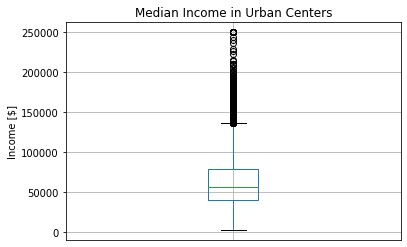

In [ ]:
urban_centers.boxplot(column=['income_x'])
plt.title('Median Income in Urban Centers')
plt.tick_params(axis='x',which='both',bottom=False,top=False, labelbottom=False)
plt.ylabel('Income [$]')

Figure 3: Box plot of median income in urban centers. Median is around 50,000 with several positive outliers.

Text(0, 0.5, 'Age')

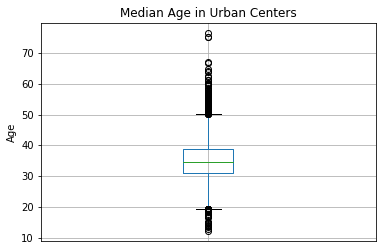

In [ ]:
urban_centers.boxplot(column=['age_x'])
plt.title('Median Age in Urban Centers')
plt.tick_params(axis='x',which='both',bottom=False,top=False, labelbottom=False)
plt.ylabel('Age')

Figure 4: Boxplot for median age in urban centers. Median is around 35 with ourliers on both ends.

Text(0, 0.5, 'Total People')

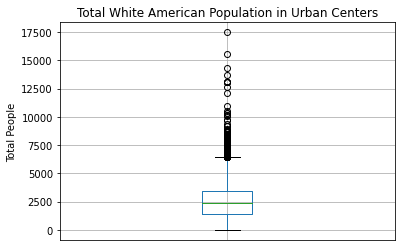

In [ ]:
urban_centers.boxplot(column=['w_pop_x'])
plt.title('Total White American Population in Urban Centers')
plt.tick_params(axis='x',which='both',bottom=False,top=False, labelbottom=False)
plt.ylabel('Total People')

Figure 5: Boxplot for total white american population. Average around 2500 with several larger cities shown as the higher outliers.

Text(0, 0.5, 'Total People')

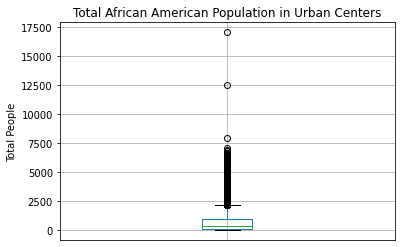

In [ ]:
urban_centers.boxplot(column=['b_pop_x'])
plt.title('Total African American Population in Urban Centers')
plt.tick_params(axis='x',which='both',bottom=False,top=False, labelbottom=False)
plt.ylabel('Total People')

Figure 6: Boxplot for african american population in urban centers. Median around 0, showing that some city tracts have no african american population. Several outliers between 2500 and 7500 people.

Text(0, 0.5, 'Total People')

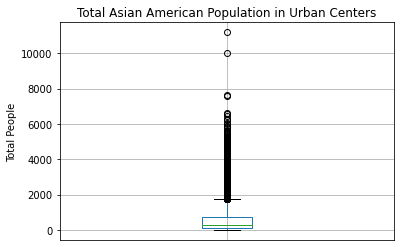

In [ ]:
urban_centers.boxplot(column=['a_pop_x'])
plt.title('Total Asian American Population in Urban Centers')
plt.tick_params(axis='x',which='both',bottom=False,top=False, labelbottom=False)
plt.ylabel('Total People')

Figure 7: Boxplot for asian american population in city centers. Median around 0, showing that some city centers have very small asian american populations. Several outliers exist between 2000 and 7000.

In [49]:
ndvi = pd.read_csv('/content/drive/My Drive/ndvi_centers_2018.csv')
ndvi

,system:index,MATCH1_x,mean,.geo
0,00000000000000000710,36Census Tract 251,0.142753,"{""type"":""Polygon"",""coordinates"":[[[-73.7632344..."
1,00000000000000000724,36Census Tract 141,0.267882,"{""type"":""Polygon"",""coordinates"":[[[-73.7774099..."
2,00000000000000000728,36Census Tract 231,0.280484,"{""type"":""Polygon"",""coordinates"":[[[-73.7714168..."
3,00000000000000000fa7,35Census Tract 47.391,0.115336,"{""type"":""Polygon"",""coordinates"":[[[-106.742710..."
4,00000000000000000fa9,35Census Tract 47.481,0.133018,"{""type"":""Polygon"",""coordinates"":[[[-106.752350..."
...,...,...,...,...
11796,00000000000000002d3f,51Census Tract 412760,0.264205,"{""type"":""Polygon"",""coordinates"":[[[-77.4541349..."
11797,00000000000000002d43,51Census Tract 403760,0.170967,"{""type"":""Polygon"",""coordinates"":[[[-77.4565562..."
11798,00000000000000002d44,51Census Tract 404760,0.162836,"{""type"":""Polygon"",""coordinates"":[[[-77.4627721..."
11799,00000000000000002d45,51Census Tract 405760,0.183882,"{""type"":""Polygon"",""coordinates"":[[[-77.4732065..."


In [50]:
urban_centers = urban_centers.merge(ndvi, left_on = 'MATCH', right_on = 'MATCH1_x')

In [51]:
urban_centers

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,state1_x,county1_x,MATCH,pop,name_x,state_x,county_x,state1_y,county1_y,MATCH1_x_x,area,pdensity,w_pop,b_pop,a_pop,age,income,name_y,state_y,county_y,state1,county1,MATCH1_y,system:index,MATCH1_x_y,mean,.geo
0,10,003,002200,10003002200,22,Census Tract 22,G5020,S,258393,0,+39.7447495,-075.5633691,"POLYGON ((-75.56731 39.74406, -75.56731 39.744...",10,3,10Census Tract 223,2753,Census Tract 22,10> county,003> tract,10,3,10Census Tract 223,0.627912,4384.371055,884,1091,33,29.2,32436.0,Census Tract 22,10> county,003> tract,10,3,10Census Tract 223,0000000000000000167e,10Census Tract 223,0.160670,"{""type"":""Polygon"",""coordinates"":[[[-75.5674312..."
1,10,003,000500,10003000500,5,Census Tract 5,G5020,S,499652,9820,+39.7544822,-075.5399945,"POLYGON ((-75.54831 39.75230, -75.54824 39.752...",10,3,10Census Tract 53,3782,Census Tract 5,10> county,003> tract,10,3,10Census Tract 53,1.237545,3056.051160,314,3343,0,36.9,56394.0,Census Tract 5,10> county,003> tract,10,3,10Census Tract 53,00000000000000001680,10Census Tract 53,0.192179,"{""type"":""Polygon"",""coordinates"":[[[-75.5483374..."
2,10,003,000601,10003000601,6.01,Census Tract 6.01,G5020,S,819673,0,+39.7527066,-075.5290060,"POLYGON ((-75.53578 39.74892, -75.53526 39.749...",10,3,10Census Tract 6.013,3420,Census Tract 6.01,10> county,003> tract,10,3,10Census Tract 6.013,1.991219,1717.540457,80,3188,0,30.9,45882.0,Census Tract 6.01,10> county,003> tract,10,3,10Census Tract 6.013,00000000000000001681,10Census Tract 6.013,0.242292,"{""type"":""Polygon"",""coordinates"":[[[-75.5359233..."
3,10,003,000602,10003000602,6.02,Census Tract 6.02,G5020,S,626036,31448,+39.7500708,-075.5369211,"POLYGON ((-75.54385 39.75031, -75.54382 39.750...",10,3,10Census Tract 6.023,2956,Census Tract 6.02,10> county,003> tract,10,3,10Census Tract 6.023,1.597409,1850.496134,226,2688,35,41.8,22284.0,Census Tract 6.02,10> county,003> tract,10,3,10Census Tract 6.023,00000000000000001682,10Census Tract 6.023,0.176440,"{""type"":""Polygon"",""coordinates"":[[[-75.5438560..."
4,10,003,001100,10003001100,11,Census Tract 11,G5020,S,518754,12917,+39.7560465,-075.5577931,"POLYGON ((-75.56322 39.75452, -75.56295 39.754...",10,3,10Census Tract 113,3464,Census Tract 11,10> county,003> tract,10,3,10Census Tract 113,1.291381,2682.399835,2477,883,24,35.1,54472.0,Census Tract 11,10> county,003> tract,10,3,10Census Tract 113,00000000000000001683,10Census Tract 113,0.231340,"{""type"":""Polygon"",""coordinates"":[[[-75.5633111..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11927,55,079,003200,55079003200,32,Census Tract 32,G5020,S,813096,0,+43.1011585,-088.0011119,"POLYGON ((-88.00709 43.09759, -88.00706 43.098...",55,79,55Census Tract 3279,2711,Census Tract 32,55> county,079> tract,55,79,55Census Tract 3279,1.640284,1652.762870,386,1847,384,37.2,47159.0,Census Tract 32,55> county,079> tract,55,79,55Census Tract 3279,00000000000000002e0f,55Census Tract 3279,0.239302,"{""type"":""Polygon"",""coordinates"":[[[-88.0070970..."
11928,55,079,003300,55079003300,33,Census Tract 33,G5020,S,1471144,0,+43.1010455,-088.0173060,"POLYGON ((-88.02764 43.09730, -88.02762 43.098...",55,79,55Census Tract 3379,5298,Census Tract 33,55> county,079> tract,55,79,55Census Tract 3379,2.967408,1785.396480,1109,3449,487,30.2,43281.0,Census Tract 33,55> county,079> tract,55,79,55Census Tract 3379,00000000000000002e10,55Census Tract 3379,0.234258,"{""type"":""Polygon"",""coordinates"":[[[-88.0276400..."
11929,55,079,005900,55079005900,59,Census Tract 59,G5020,S,850834,0,+43.0682111,-087.9852358,"POLYGON ((-87.99353 43.06774, -87.99353 43.068...",55,79,55Census Tract 5979,3697,Census Tract 59,55> county,079> tract,55,79,55Census Tract 5979,1.718505,2151.288992,1007,2387,35,28.8,37341.0,Census Tract 59,55> county,079> tract,55,79,55Census 

Text(0, 0.5, 'Normalized Difference Vegetation Index')

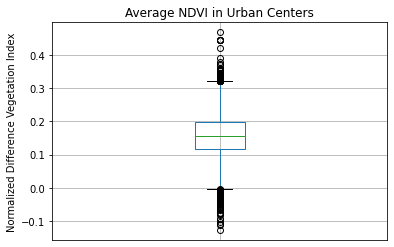

In [ ]:
urban_centers.boxplot(column=['mean'])
plt.title('Average NDVI in Urban Centers')
plt.tick_params(axis='x',which='both',bottom=False,top=False, labelbottom=False)
plt.ylabel('Normalized Difference Vegetation Index')

Figure 7: Boxplot for NDVI. Median is around .1, showing there is a good spread of differently vegetated cities, with many outliers above and below the box.

In [52]:
import scipy as sp

In [53]:
centers = urban_centers[['pdensity', 'w_pop', 'b_pop', 'a_pop', 'age', 'income', 'mean']]
centers = centers.rename({'mean': 'NDVI'}, axis=1)
centers1 = centers.rename({'pdensity': 'Population Density', 'w_pop': 'White American Population', 'b_pop': 'African American Population', 'a_pop': 'Asian American Population', 'age': 'Age', 'income': 'Income'}, axis=1) 
centers

,pdensity,w_pop,b_pop,a_pop,age,income,NDVI
0,4384.371055,884,1091,33,29.2,32436.0,0.160670
1,3056.051160,314,3343,0,36.9,56394.0,0.192179
2,1717.540457,80,3188,0,30.9,45882.0,0.242292
3,1850.496134,226,2688,35,41.8,22284.0,0.176440
4,2682.399835,2477,883,24,35.1,54472.0,0.231340
...,...,...,...,...,...,...,...
11927,1652.762870,386,1847,384,37.2,47159.0,0.239302
11928,1785.396480,1109,3449,487,30.2,43281.0,0.234258
11929,2151.288992,1007,2387,35,28.8,37341.0,0.217460
11930,2287.827351,411,2504,51,28.3,24266.0,0.244101


In [54]:
centers1.corr()

,Population Density,White American Population,African American Population,Asian American Population,Age,Income,NDVI
Population Density,1.000000,-0.125372,0.161837,0.036315,-0.037007,-0.074963,-0.457279
White American Population,-0.125372,1.000000,-0.437615,0.037993,0.011312,0.287594,0.125374
African American Population,0.161837,-0.437615,1.000000,-0.194641,-0.085651,-0.308283,-0.078831
Asian American Population,0.036315,0.037993,-0.194641,1.000000,0.219560,0.297309,0.021269
Age,-0.037007,0.011312,-0.085651,0.219560,1.000000,0.441657,0.003762
Income,-0.074963,0.287594,-0.308283,0.297309,0.441657,1.000000,0.126202
NDVI,-0.457279,0.125374,-0.078831,0.021269,0.003762,0.126202,1.000000


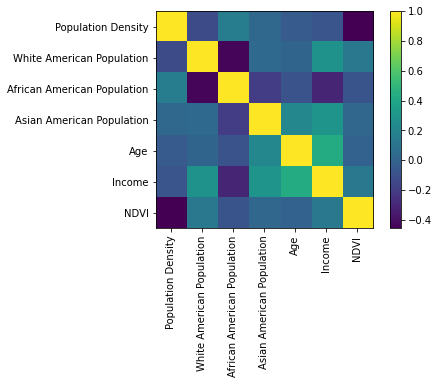

In [55]:
plt.imshow(centers1.corr())
plt.xticks(range(len(centers1.corr())), centers1.corr().columns, rotation='vertical')
plt.yticks(range(len(centers1.corr())), centers1.corr().columns)
plt.colorbar();

Figure 8: Correlation plot for NDVI and socioeconomic variables. Income and age show the highest correlation. NDVI does have a small correlation with the socioeconomic variables.

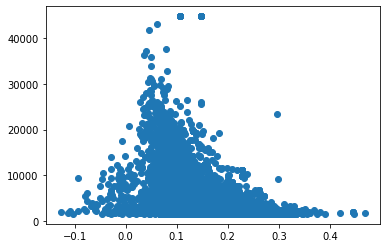

In [56]:
plt.plot(centers['NDVI'], centers['pdensity'], 'o')


Figure 8: Plot of NDVI by population density. A trend can be seen in which high and low NDVI have low population density while median NDVI has high population density.

In [ ]:
centers1.describe()

Health Data

In [57]:
health = pd.read_csv('/content/drive/My Drive/health_data.csv')
health

,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,ARTHRITIS_Crude95CI,BINGE_CrudePrev,BINGE_Crude95CI,BPHIGH_CrudePrev,BPHIGH_Crude95CI,BPMED_CrudePrev,BPMED_Crude95CI,CANCER_CrudePrev,CANCER_Crude95CI,CASTHMA_CrudePrev,CASTHMA_Crude95CI,CHD_CrudePrev,CHD_Crude95CI,CHECKUP_CrudePrev,CHECKUP_Crude95CI,CHOLSCREEN_CrudePrev,CHOLSCREEN_Crude95CI,COLON_SCREEN_CrudePrev,COLON_SCREEN_Crude95CI,COPD_CrudePrev,COPD_Crude95CI,COREM_CrudePrev,COREM_Crude95CI,COREW_CrudePrev,COREW_Crude95CI,CSMOKING_CrudePrev,CSMOKING_Crude95CI,DENTAL_CrudePrev,DENTAL_Crude95CI,DIABETES_CrudePrev,DIABETES_Crude95CI,HIGHCHOL_CrudePrev,HIGHCHOL_Crude95CI,KIDNEY_CrudePrev,KIDNEY_Crude95CI,LPA_CrudePrev,LPA_Crude95CI,MAMMOUSE_CrudePrev,MAMMOUSE_Crude95CI,MHLTH_CrudePrev,MHLTH_Crude95CI,OBESITY_CrudePrev,OBESITY_Crude95CI,PAPTEST_CrudePrev,PAPTEST_Crude95CI,PHLTH_CrudePrev,PHLTH_Crude95CI,SLEEP_CrudePrev,SLEEP_Crude95CI,STROKE_CrudePrev,STROKE_Crude95CI,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,Geolocation
0,AL,Birmingham,107000,1073000100,0107000-01073000100,3042,24.4,"(21.2, 27.8)",31.2,"(30.1, 32.2)",10.3,"( 9.8, 10.7)",47.7,"(46.6, 48.8)",77.8,"(77.0, 78.6)",5.3,"( 5.0, 5.5)",13.4,"(12.7, 14.3)",7.8,"( 7.3, 8.3)",74.8,"(74.1, 75.5)",78.6,"(77.1, 80.0)",56.8,"(53.5, 59.9)",11.3,"(10.1, 12.5)",29.7,"(25.5, 34.3)",23.2,"(20.4, 26.1)",27.9,"(25.3, 30.6)",42.8,"(39.4, 46.0)",17.4,"(16.6, 18.3)",35.3,"(34.5, 36.2)",4.3,"( 4.0, 4.5)",44.0,"(41.4, 46.5)",82.8,"(80.2, 84.7)",20.5,"(18.9, 22.1)",46.4,"(45.2, 47.5)",85.0,"(83.4, 86.6)",20.5,"(18.9, 22.2)",45.5,"(44.3, 46.5)",5.5,"( 5.0, 5.9)",28.9,"(23.7, 35.1)","(33.57943283260, -86.7228323926)"
1,AL,Birmingham,107000,1073000300,0107000-01073000300,2735,30.4,"(27.1, 33.7)",30.5,"(29.3, 31.7)",10.5,"(10.1, 10.9)",48.2,"(47.1, 49.3)",78.5,"(77.6, 79.3)",4.7,"( 4.6, 4.8)",12.5,"(11.7, 13.3)",8.6,"( 7.9, 9.3)",72.1,"(71.4, 72.8)",76.0,"(74.6, 77.4)",53.8,"(49.7, 57.8)",11.9,"(10.6, 13.2)",26.4,"(22.2, 31.0)",20.9,"(17.7, 25.0)",29.3,"(26.5, 32.0)",39.7,"(36.3, 43.5)",19.8,"(18.6, 20.9)",36.8,"(35.9, 37.7)",4.6,"( 4.3, 4.9)",47.5,"(44.9, 49.9)",83.2,"(80.4, 85.7)",21.2,"(19.6, 22.7)",47.8,"(46.6, 48.9)",83.8,"(81.9, 85.6)",22.2,"(20.4, 24.0)",44.5,"(43.2, 45.7)",6.1,"( 5.5, 6.8)",32.9,"(25.5, 40.2)","(33.54282086860, -86.7524339780)"
2,AL,Birmingham,107000,1073000400,0107000-01073000400,3338,24.7,"(21.1, 28.5)",31.5,"(30.2, 32.9)",10.4,"( 9.9, 11.0)",49.1,"(47.8, 50.4)",79.4,"(78.5, 80.3)",5.3,"( 5.2, 5.5)",13.3,"(12.4, 14.4)",7.5,"( 6.9, 8.2)",76.6,"(75.8, 77.4)",80.2,"(78.5, 82.0)",59.7,"(55.2, 63.9)",10.5,"( 9.2, 12.0)",28.0,"(23.3, 33.4)",23.2,"(19.6, 27.0)",25.9,"(22.8, 29.0)",44.1,"(40.0, 48.0)",18.4,"(17.3, 19.6)",35.6,"(34.5, 36.6)",4.2,"( 4.0, 4.5)",43.0,"(40.0, 45.9)",83.5,"(80.6, 85.9)",18.8,"(17.1, 20.7)",45.7,"(44.3, 46.9)",84.6,"(82.3, 86.8)",19.4,"(17.5, 21.4)",45.7,"(44.2, 47.0)",5.6,"( 5.0, 6.2)",28.6,"(22.0, 35.1)","(33.56324496330, -86.7640474064)"
3,AL,Birmingham,107000,1073000500,0107000-01073000500,2864,25.2,"(21.6, 29.0)",35.0,"(33.5, 36.4)",9.1,"( 8.6, 9.6)",54.1,"(52.7, 55.3)",82.1,"(81.3, 82.9)",6.0,"( 5.8, 6.3)",13.6,"(12.7, 14.7)",9.6,"( 8.7, 10.6)",78.2,"(77.4, 78.9)",80.5,"(78.7, 82.1)",57.9,"(53.4, 62.0)",12.3,"(10.7, 14.0)",24.4,"(18.9, 30.5)",19.8,"(16.0, 23.8)",26.3,"(23.0, 29.4)",39.4,"(35.3, 43.8)",22.4,"(21.1, 23.8)",38.4,"(37.2, 39.5)",5.3,"( 4.9, 5.7)",45.9,"(42.6, 48.9)",83.8,"(81.1, 86.3)",19.4,"(17.7, 21.2)",48.0,"(46.5, 49.3)",84.3,"(82.1, 86.5)",21.7,"(19.7, 23.9)",46.1,"(44.5, 47.4)",7.3,"( 6.5, 8.2)",34.0,"(24.4, 42.9)","(33.54424045940, -86.7749130719)"
4,AL,Birmingham,107000,1073000700,0107000-01073000700,2577,29.0,"(24.5, 33.8)",36.3,"(34.9, 37.7)",7.6,"( 7.1, 8.2)",56.5,"(55.1, 57.8)",81.8,"(80.8, 82.7)",5.9,"( 5.7, 6.2)",14.7,"(13.6, 16.0)",11.4,"(10.4, 12.5)",78.1,"(77.0, 79.1)",77.4,"(75.2, 79.6)",53.2,"(48.8, 57.4)",14.8,"(12.9, 16.8)",21.9,"(16.8, 27.7)",16.7,"(13.3, 20.6)",30.9,"(26.9, 34.5)",

In [58]:
# Arthritis = ARTHRITIS_CrudePrev, Binge drinking = BINGE_CrudePrev, high blood pressure = BPHIGH_CrudePrev, cancer = CANCER_CrudePrev, 
# asthma = CASTHMA_CrudePrev, coronary heart disease = CHD_CrudePrev, chronic pulmonary disease = COPD_CrudePrev, diabeties = DIABETES_CrudePrev,
# Sleep less than 7 hrs = SLEEP_CrudePrev, strokes = STROKE_CrudePrev

health1 = health[['StateAbbr', 'PlaceName', 'PlaceFIPS', 'TractFIPS', 'Place_TractID', 'ARTHRITIS_CrudePrev', 'BINGE_CrudePrev', 'BPHIGH_CrudePrev', 'CANCER_CrudePrev', 'CASTHMA_CrudePrev', 'CHD_CrudePrev', 'COPD_CrudePrev', 'DIABETES_CrudePrev', 'SLEEP_CrudePrev', 'STROKE_CrudePrev']]

health_new = health1.rename({'ARTHRITIS_CrudePrev': 'Arthritis','BINGE_CrudePrev': 'Binge_Drinking','BPHIGH_CrudePrev': 'High_Blood_Pressure','CANCER_CrudePrev': 'Cancer','CASTHMA_CrudePrev': 'Asthma','CHD_CrudePrev': 'Coronary_Heart_Disease','CHD_CrudePrev': 'Coronary_Heart_Disease','COPD_CrudePrev': 'Chronic_Pulmonary_Disease','DIABETES_CrudePrev': 'Diabetes','SLEEP_CrudePrev': 'Sleep','STROKE_CrudePrev': 'Stroke'}, axis=1)

health_new

,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Arthritis,Binge_Drinking,High_Blood_Pressure,Cancer,Asthma,Coronary_Heart_Disease,Chronic_Pulmonary_Disease,Diabetes,Sleep,Stroke
0,AL,Birmingham,107000,1073000100,0107000-01073000100,31.2,10.3,47.7,5.3,13.4,7.8,11.3,17.4,45.5,5.5
1,AL,Birmingham,107000,1073000300,0107000-01073000300,30.5,10.5,48.2,4.7,12.5,8.6,11.9,19.8,44.5,6.1
2,AL,Birmingham,107000,1073000400,0107000-01073000400,31.5,10.4,49.1,5.3,13.3,7.5,10.5,18.4,45.7,5.6
3,AL,Birmingham,107000,1073000500,0107000-01073000500,35.0,9.1,54.1,6.0,13.6,9.6,12.3,22.4,46.1,7.3
4,AL,Birmingham,107000,1073000700,0107000-01073000700,36.3,7.6,56.5,5.9,14.7,11.4,14.8,25.0,48.3,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27205,WY,Cheyenne,5613900,56021001401,5613900-56021001401,22.9,17.9,29.0,6.3,9.5,5.2,5.8,8.1,32.9,2.5
27206,WY,Cheyenne,5613900,56021001402,5613900-56021001402,27.3,15.1,33.1,9.0,9.2,6.7,6.2,8.8,30.2,3.3
27207,WY,Cheyenne,5613900,56021001501,5613900-56021001501,22.0,18.4,27.8,6.4,9.4,4.6,5.3,7.4,32.9,2.3
27208,WY,Cheyenne,5613900,56021001502,5613900-56021001502,25.2,16.0,31.9,6.9,9.9,6.3,7.0,9.4,34.8,3.2


In [59]:
hdes = health_new[['Arthritis', 'Binge_Drinking', 'High_Blood_Pressure', 'Cancer', 'Asthma', 'Coronary_Heart_Disease', 'Chronic_Pulmonary_Disease', 'Diabetes', 'Sleep', 'Stroke']]
hdes.describe()

,Arthritis,Binge_Drinking,High_Blood_Pressure,Cancer,Asthma,Coronary_Heart_Disease,Chronic_Pulmonary_Disease,Diabetes,Sleep,Stroke
count,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000
mean,21.430129,18.066953,30.653208,5.648912,9.741352,5.602977,6.309960,10.811062,36.716836,3.211466
std,5.995361,4.032559,8.260472,1.803257,1.710538,2.118858,2.545739,4.269441,5.956493,1.449541
min,2.400000,2.800000,5.300000,0.700000,5.600000,0.300000,1.000000,0.800000,16.100000,0.300000
25%,17.300000,15.500000,25.300000,4.500000,8.500000,4.200000,4.500000,7.900000,32.400000,2.300000
50%,21.000000,17.800000,29.500000,5.500000,9.400000,5.300000,5.800000,10.000000,36.100000,2.900000
75%,25.100000,20.300000,34.900000,6.600000,10.700000,6.700000,7.600000,12.900000,40.600000,3.800000
max,58.400000,44.100000,70.300000,22.900000,17.800000,35.800000,23.800000,39.500000,58.700000,19.500000


In [60]:
health_new = health_new.dropna()
health_new

,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Arthritis,Binge_Drinking,High_Blood_Pressure,Cancer,Asthma,Coronary_Heart_Disease,Chronic_Pulmonary_Disease,Diabetes,Sleep,Stroke
0,AL,Birmingham,107000,1073000100,0107000-01073000100,31.2,10.3,47.7,5.3,13.4,7.8,11.3,17.4,45.5,5.5
1,AL,Birmingham,107000,1073000300,0107000-01073000300,30.5,10.5,48.2,4.7,12.5,8.6,11.9,19.8,44.5,6.1
2,AL,Birmingham,107000,1073000400,0107000-01073000400,31.5,10.4,49.1,5.3,13.3,7.5,10.5,18.4,45.7,5.6
3,AL,Birmingham,107000,1073000500,0107000-01073000500,35.0,9.1,54.1,6.0,13.6,9.6,12.3,22.4,46.1,7.3
4,AL,Birmingham,107000,1073000700,0107000-01073000700,36.3,7.6,56.5,5.9,14.7,11.4,14.8,25.0,48.3,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27205,WY,Cheyenne,5613900,56021001401,5613900-56021001401,22.9,17.9,29.0,6.3,9.5,5.2,5.8,8.1,32.9,2.5
27206,WY,Cheyenne,5613900,56021001402,5613900-56021001402,27.3,15.1,33.1,9.0,9.2,6.7,6.2,8.8,30.2,3.3
27207,WY,Cheyenne,5613900,56021001501,5613900-56021001501,22.0,18.4,27.8,6.4,9.4,4.6,5.3,7.4,32.9,2.3
27208,WY,Cheyenne,5613900,56021001502,5613900-56021001502,25.2,16.0,31.9,6.9,9.9,6.3,7.0,9.4,34.8,3.2


Text(0, 0.5, 'Percentage of Population')

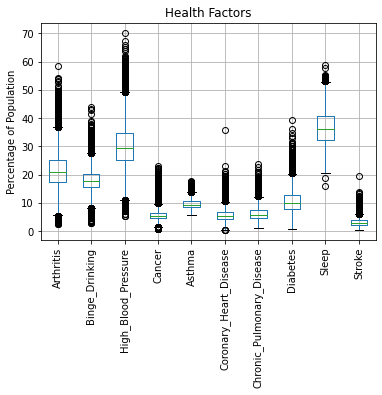

In [61]:
hdes.boxplot()
plt.title('Health Factors')
plt.xticks(rotation='vertical')
plt.ylabel('Percentage of Population')

Figure 9: Box and whisker plots for all of the health variables. Stroke has the lowest median while sleep has the highest. However, high blood pressure has several high outliers indicating that some cities have very high rates of high blood pressure around 70%.

In [62]:
hdes

,Arthritis,Binge_Drinking,High_Blood_Pressure,Cancer,Asthma,Coronary_Heart_Disease,Chronic_Pulmonary_Disease,Diabetes,Sleep,Stroke
0,31.2,10.3,47.7,5.3,13.4,7.8,11.3,17.4,45.5,5.5
1,30.5,10.5,48.2,4.7,12.5,8.6,11.9,19.8,44.5,6.1
2,31.5,10.4,49.1,5.3,13.3,7.5,10.5,18.4,45.7,5.6
3,35.0,9.1,54.1,6.0,13.6,9.6,12.3,22.4,46.1,7.3
4,36.3,7.6,56.5,5.9,14.7,11.4,14.8,25.0,48.3,9.0
...,...,...,...,...,...,...,...,...,...,...
27205,22.9,17.9,29.0,6.3,9.5,5.2,5.8,8.1,32.9,2.5
27206,27.3,15.1,33.1,9.0,9.2,6.7,6.2,8.8,30.2,3.3
27207,22.0,18.4,27.8,6.4,9.4,4.6,5.3,7.4,32.9,2.3
27208,25.2,16.0,31.9,6.9,9.9,6.3,7.0,9.4,34.8,3.2


In [66]:
# Calculate the average
arthritis_m = hdes['Arthritis'].mean()
drinking_m = hdes['Binge_Drinking'].mean()
bp_m = hdes['High_Blood_Pressure'].mean()
cancer_m = hdes['Cancer'].mean()
chd_m = hdes['Coronary_Heart_Disease'].mean()
cpd_m = hdes['Chronic_Pulmonary_Disease'].mean()
diabetes_m = hdes['Diabetes'].mean()
sleep_m = hdes['Sleep'].mean()
stroke_m = hdes['Stroke'].mean()



# Calculate the standard deviation
arthritis_s = hdes['Arthritis'].std()
drinking_s = hdes['Binge_Drinking'].std()
bp_s = hdes['High_Blood_Pressure'].std()
cancer_s = hdes['Cancer'].std()
chd_s = hdes['Coronary_Heart_Disease'].std()
cpd_s = hdes['Chronic_Pulmonary_Disease'].std()
diabetes_s = hdes['Diabetes'].std()
sleep_s = hdes['Sleep'].std()
stroke_s = hdes['Stroke'].std()


# Define labels, positions, bar heights and error bar heights
labels = ['Arthritis', 'Binge Drinking', 'High Blood Pressure', 'Cancer', 'Coronary Heart Disease', 'Chronic Pulmonary Disease', 'Diabetes', 'Sleep Under 8 Hours', 'Stroke']
x_pos = np.arange(len(labels))
CTEs = [arthritis_m, drinking_m, bp_m, cancer_m, chd_m, cpd_m, diabetes_m, sleep_m, stroke_m]
error = [arthritis_s, drinking_s, bp_s, cancer_s, chd_s, cpd_s, diabetes_s, sleep_s, stroke_s]

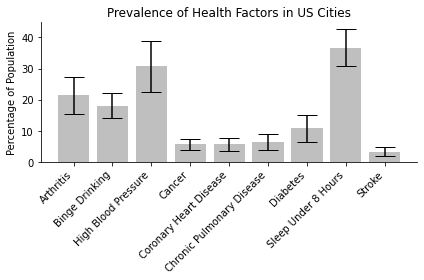

In [110]:
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       color='grey',
       ecolor='black',
       capsize=10)
ax.set_ylabel('Percentage of Population')

ax.set_xticks(x_pos)
ax.set_xticklabels(labels, rotation = 45, ha="right")
ax.set_title('Prevalence of Health Factors in US Cities')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()


Figure 10: New plot of health factors averaged accross all US cities. Error bars represent 1 standard deviation. Sleep under 8 hours and high blood pressure are the most prevalent on average, while cancer and strokes are the least.